In [37]:
from wrangle_data_funcs import *
from modelling_funcs import *
from predict_gw_scores import *
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [38]:
training_year, training_n_gws, pred_year, pred_gw, alpha, features, model, output = get_params()
features = [
        'assists', 'bonus', 'bps', 'clean_sheets', 'goals_conceded',
        'goals_scored', 'influence', 'creativity', 'threat', 'ict_index',
        'minutes', 'ewma_total_points', 
        'ewma_team_goals', 
        'ewma_team_points',
        'ewma_team_goals_nw_opponent', 
        'ewma_team_points_nw_opponent'
        ]
training_df = get_training_df(training_year, training_n_gws, alpha)
test_model(training_df, features, model)
prediction_df = get_prediction_df(pred_year, pred_gw, alpha)

# pred_df.to_csv(f"{output}.csv", index=False)
# pred_df_simple.to_csv(f'{output}_simple.csv', index=False)


{'GK': 2.0962160119369093, 'DEF': 2.139696670607732, 'MID': 2.2385495433720943, 'FWD': 2.736262449919245}


In [39]:
prediction_df.query('full_name in ["gianluigi_donnarumma", "josko_gvardiol", "phil_foden", "erling_haaland"]')
# prediction_df.iloc[[207, 243, 378, 586], 40] = 20

full_name  gw  total_points position      team  opponent_team  \
207        erling_haaland   5             9      FWD  Man City              1   
243  gianluigi_donnarumma   5             1       GK  Man City              1   
378        josko_gvardiol   5             4      DEF  Man City              1   
586            phil_foden   5             3      MID  Man City              1   

          xP  assists   bonus      bps  ...  transfers_out     value  \
207  8.02815      0.0  2.6913  39.4753  ...    102289.7649  140.9570   
243  4.20000      0.0  0.0000  20.3000  ...     13804.8000   55.0000   
378  1.51500      0.0  0.0000   9.4200  ...    101866.8288   58.7301   
586  3.47281      0.0  0.4200  11.5932  ...     17185.5210   80.0000   

     yellow_cards  opponent_team_name  ewma_team_goals  ewma_team_points  \
207           0.0             Arsenal           2.0374            1.6503   
243           0.3             Arsenal           2.0374            1.6503   
378           0.0             Arsenal           2.0374            1.6503   
586           0.0             Arsenal           2.0374            1.6503   

     team_name_nw_opponent  team_nw_opponent  ewma_team_goals_nw_opponent  \
207                Burnley           Burnley                       0.7998   
243                Burnley           Burnley                       0.7998   
378                Burnley           Burnley                       0.7998   
586                Burnley           Burnley                       0.7998   

     ewma_team_points_nw_opponent  
207                        0.6087  
243                        0.6087  
378                        0.6087  
586                        0.6087  

[4 rows x 41 columns]

In [40]:
prediction_df1  = prediction_df.copy()
prediction_df2  = prediction_df.copy()
prediction_df3  = prediction_df.copy()

prediction_df2.iloc[[207, 243, 378, 586], 7] = 200
# prediction_df3.iloc[[207, 243, 378, 586], 40] = 20

In [41]:
pred_df1 = train_full_model(training_df, features, prediction_df1, model)
pred_df1 = merge_ownership_data(pred_df1)
pred_df1_simple = pred_df1[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]

In [42]:
pred_df2 = train_full_model(training_df, features, prediction_df2, model)
pred_df2 = merge_ownership_data(pred_df2)
pred_df2_simple = pred_df2[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]

In [43]:
pred_df3 = train_full_model(training_df, features, prediction_df3, model)
pred_df3 = merge_ownership_data(pred_df3)
pred_df3_simple = pred_df3[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]

In [44]:
pred_df1_simple.query('full_name in ["gianluigi_donnarumma", "josko_gvardiol", "phil_foden", "erling_haaland"]')

full_name position      team  ewma_total_points  \
207        erling_haaland      FWD  Man City            10.0801   
243  gianluigi_donnarumma       GK  Man City             4.5000   
378        josko_gvardiol      DEF  Man City             2.4600   
586            phil_foden      MID  Man City             3.5229   

     predicted_points    owner  
207          5.339121  88376.0  
243          3.556539  85076.0  
378          1.812531  85076.0  
586          2.180072  88376.0

In [45]:
pred_df2_simple.query('full_name in ["gianluigi_donnarumma", "josko_gvardiol", "phil_foden", "erling_haaland"]')

full_name position      team  ewma_total_points  \
207        erling_haaland      FWD  Man City            10.0801   
243  gianluigi_donnarumma       GK  Man City             4.5000   
378        josko_gvardiol      DEF  Man City             2.4600   
586            phil_foden      MID  Man City             3.5229   

     predicted_points    owner  
207       -766.345702  88376.0  
243       -128.340896  85076.0  
378       -243.809676  85076.0  
586       -311.843990  88376.0

In [46]:
pred_df3_simple.query('full_name in ["gianluigi_donnarumma", "josko_gvardiol", "phil_foden", "erling_haaland"]')

full_name position      team  ewma_total_points  \
207        erling_haaland      FWD  Man City            10.0801   
243  gianluigi_donnarumma       GK  Man City             4.5000   
378        josko_gvardiol      DEF  Man City             2.4600   
586            phil_foden      MID  Man City             3.5229   

     predicted_points    owner  
207          5.339121  88376.0  
243          3.556539  85076.0  
378          1.812531  85076.0  
586          2.180072  88376.0

# Checking coeffs

In [32]:
def train_full_model(training_df, features, prediction_df, model_func):
    model_dict, _ = create_model(training_df, features, model_func, test=False)
    pred_df = predict_scores(prediction_df.dropna(), features, model_dict)
    return pred_df, model_dict

In [33]:
training_year, training_n_gws, pred_year, pred_gw, alpha, features, model_func, output = get_params()
features = [
        'assists', 'bonus', 'bps', 'clean_sheets', 'goals_conceded',
        'goals_scored', 'influence', 'creativity', 'threat', 'ict_index',
        'minutes', 'ewma_total_points', 
        'ewma_team_goals', 
        'ewma_team_points',
        'ewma_team_goals_nw_opponent', 
        'ewma_team_points_nw_opponent'
        ]
training_df = get_training_df(training_year, training_n_gws, alpha)
test_model(training_df, features, model_func)
prediction_df = get_prediction_df(pred_year, pred_gw, alpha)
pred_df, _ = train_full_model(training_df, features, prediction_df, model_func)
pred_df = merge_ownership_data(pred_df)
pred_df_simple = pred_df[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]

{'GK': 2.0962160119369093, 'DEF': 2.139696670607732, 'MID': 2.2385495433720943, 'FWD': 2.736262449919245}


In [34]:
pd.DataFrame({'GK': _['GK'].coef_,
              'DEF': _['DEF'].coef_,
              'MID': _['MID'].coef_,
              'FWD': _['FWD'].coef_}, index=features)

GK       DEF       MID       FWD
assists                      -6.594872e-01 -1.228111 -1.570120 -3.858424
bonus                        -1.115083e-01 -0.156482 -0.831154 -0.930819
bps                          -1.577012e-01  0.001548 -0.016242 -0.043676
clean_sheets                  2.562584e-01 -2.415430 -0.578117 -0.241966
goals_conceded               -7.970394e-01  0.025200 -0.011650 -0.225913
goals_scored                 -7.688294e-15 -2.824247 -3.023118 -1.418438
influence                     6.880713e-01  0.314568  0.098601  0.148913
creativity                    8.613596e-01  0.343642  0.123738  0.231070
threat                        2.584616e-01  0.355877  0.140931  0.143442
ict_index                    -7.003175e+00 -3.277126 -0.978603 -1.598732
minutes                       5.859081e-02  0.017274  0.004486  0.022351
ewma_total_points             3.293983e-01  0.598449  0.835813  1.094491
ewma_team_goals               9.483785e-02  0.042317 -0.066848 -0.146353
ewma_team_points              3.439985e-02  0.096783  0.084889  0.197630
ewma_team_goals_nw_opponent   1.615777e-01  0.105610 -0.009217 -0.074013
ewma_team_points_nw_opponent -3.476550e-02  0.005293  0.077594  0.111219

In [13]:
model = LinearRegression()

test1 = model

In [14]:
test1

LinearRegression()

In [ ]:
# def main():
#     training_year, training_n_gws, pred_year, pred_gw, alpha, features, output = get_params()
#     training_df = get_training_df(training_year, training_n_gws, alpha)
#     test_model(training_df, features)
#     prediction_df = get_prediction_df(pred_year, pred_gw, alpha)
#     pred_df = train_full_model(training_df, features, prediction_df)
#     pred_df = merge_ownership_data(pred_df)
#     pred_df_simple = pred_df[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]
#     pred_df.to_csv(f"{output}.csv", index=False)
#     pred_df_simple.to_csv(f'{output}_simple.csv', index=False)

# Drawing plots like I should've done ages ago

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
training_year, training_n_gws, pred_year, pred_gw, alpha, features, model, output = get_params()
features = [
        'assists', 'bonus', 'bps', 'clean_sheets', 'goals_conceded',
        'goals_scored', 'influence', 'creativity', 'threat', 'ict_index',
        'minutes', 'ewma_total_points', 
        'ewma_team_goals', 
        'ewma_team_points',
        'ewma_team_goals_nw_opponent', 
        'ewma_team_points_nw_opponent'
        ]
training_df = get_training_df(training_year, training_n_gws, alpha)
# test_model(training_df, features, model)
# prediction_df1 = get_prediction_df(pred_year, pred_gw, alpha)
# pred_df1 = train_full_model(training_df, features, prediction_df1, model)
# pred_df1 = merge_ownership_data(pred_df1)
# pred_df1_simple = pred_df1[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]


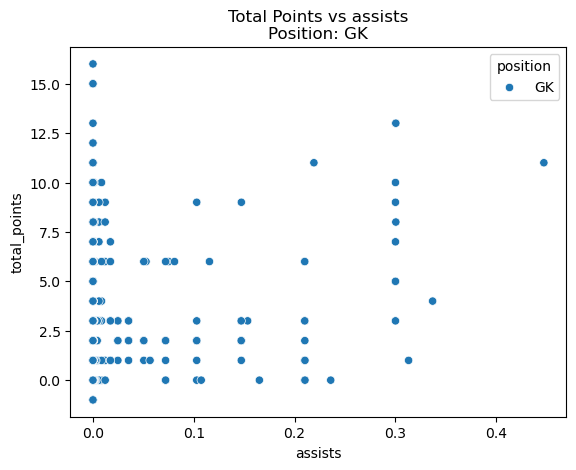

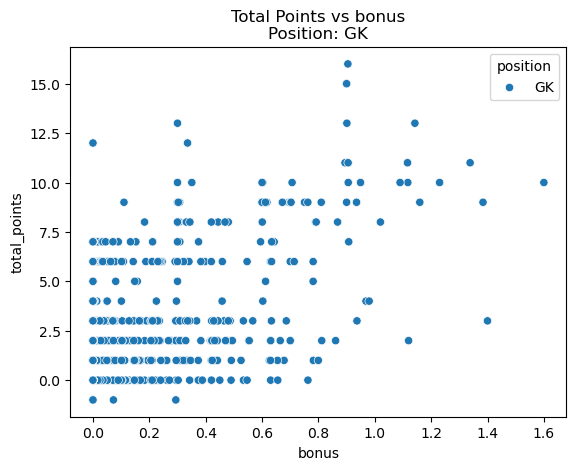

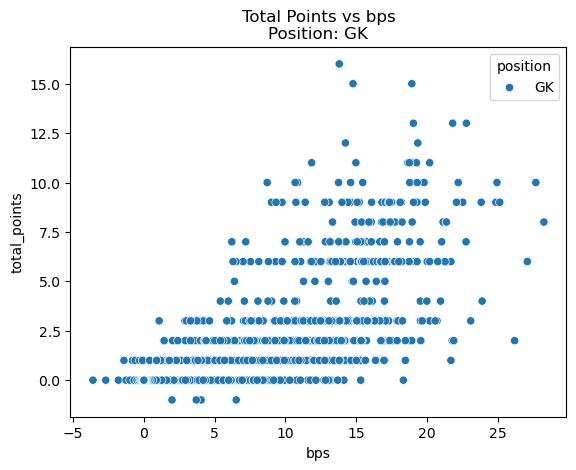

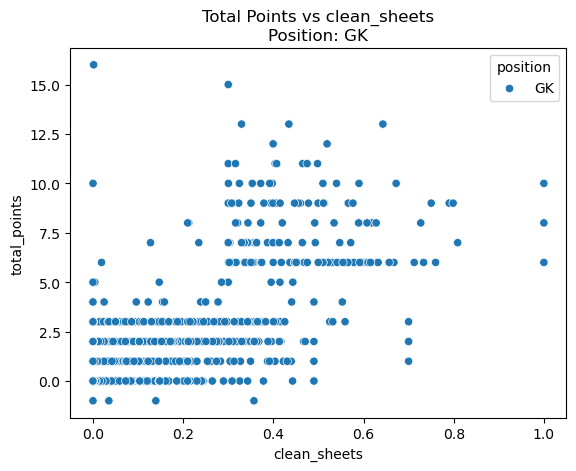

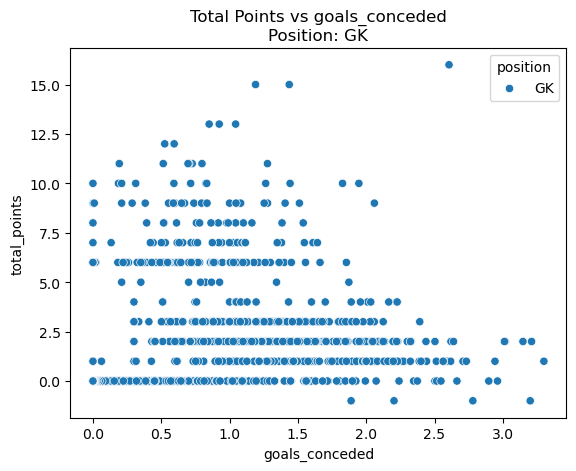

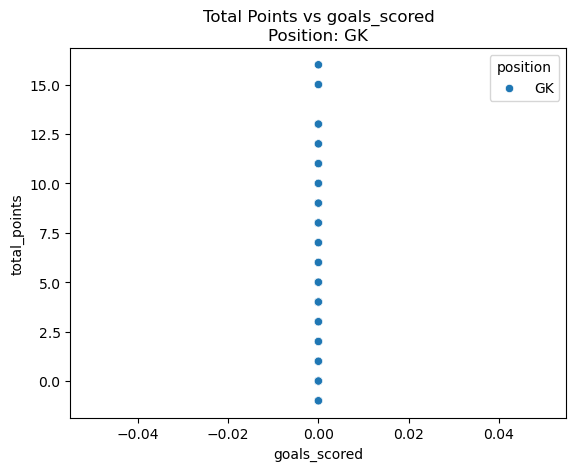

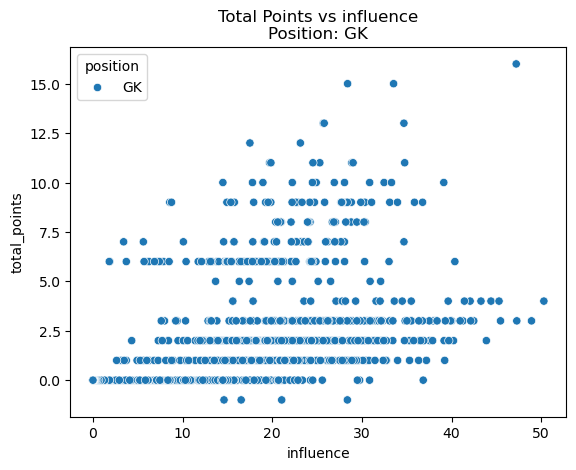

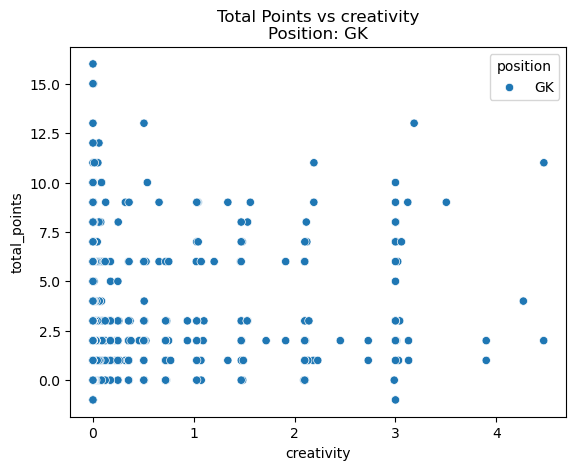

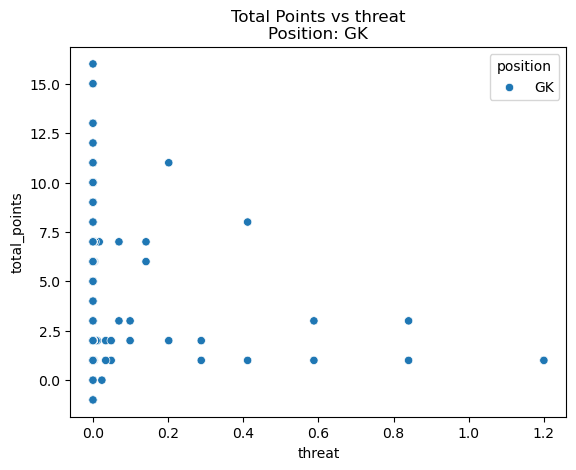

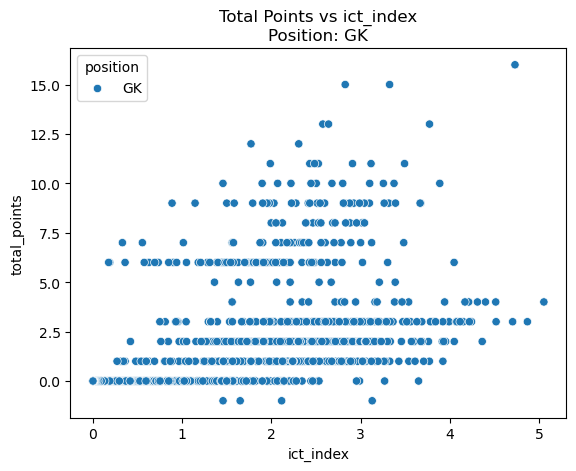

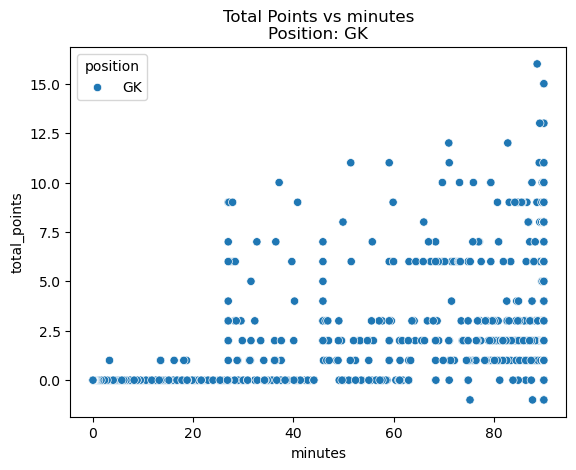

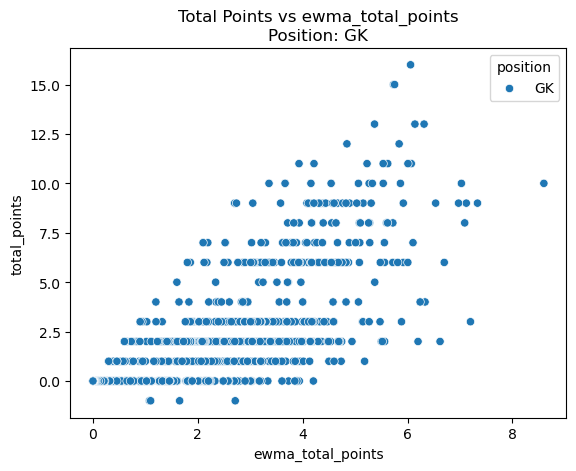

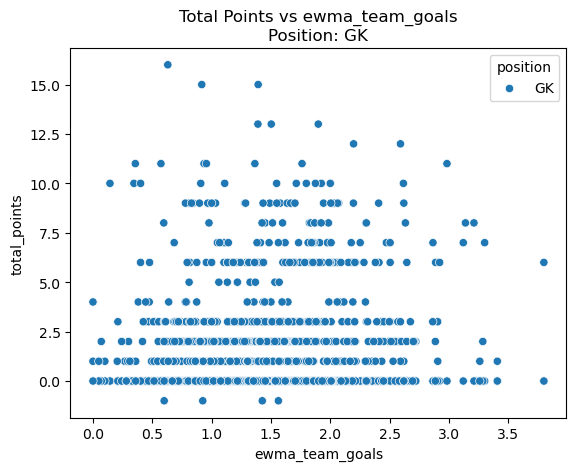

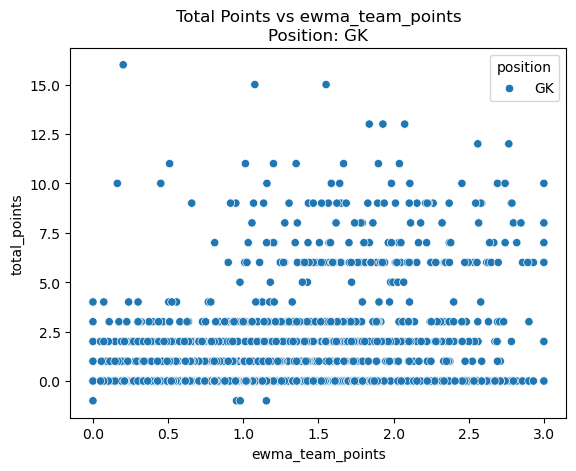

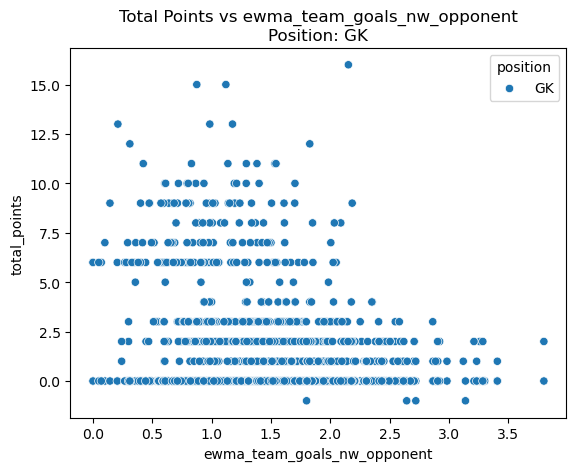

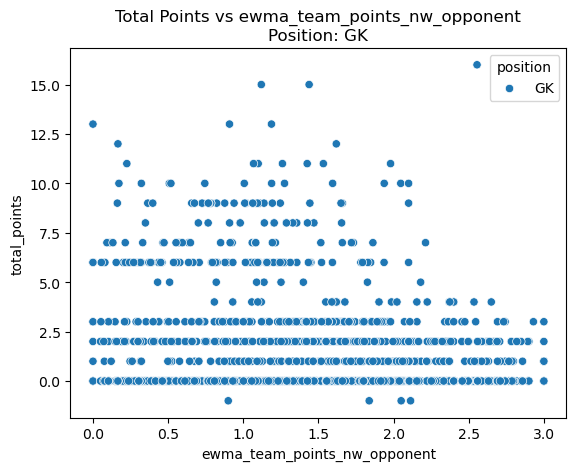

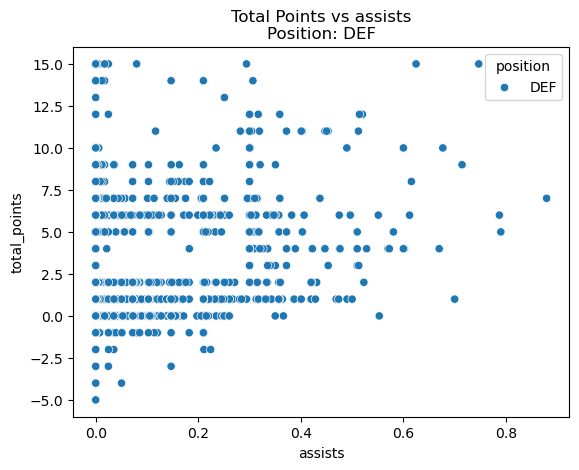

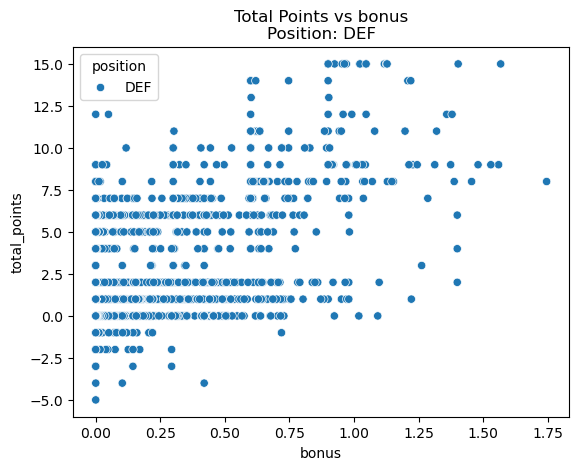

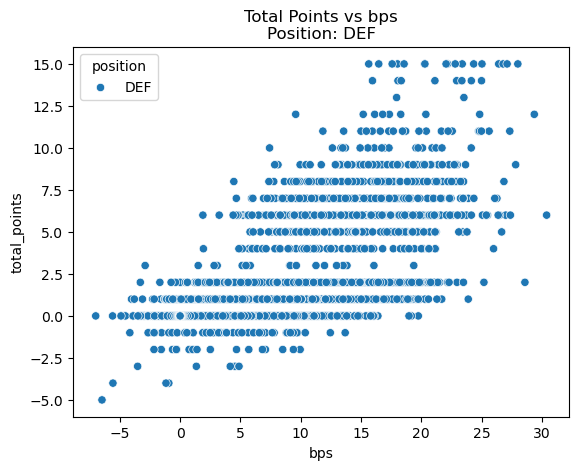

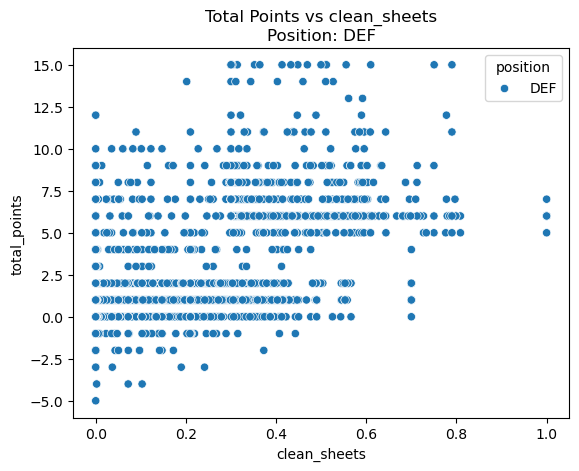

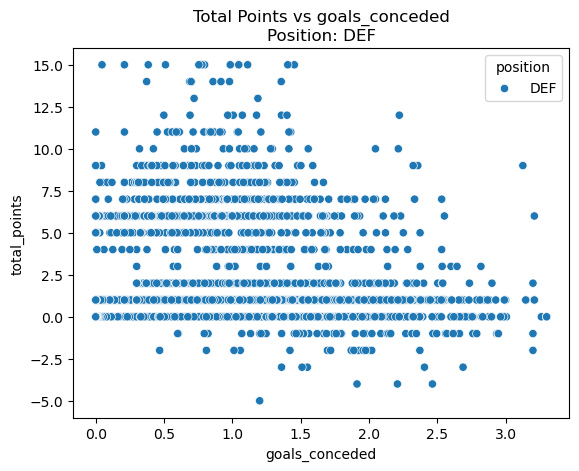

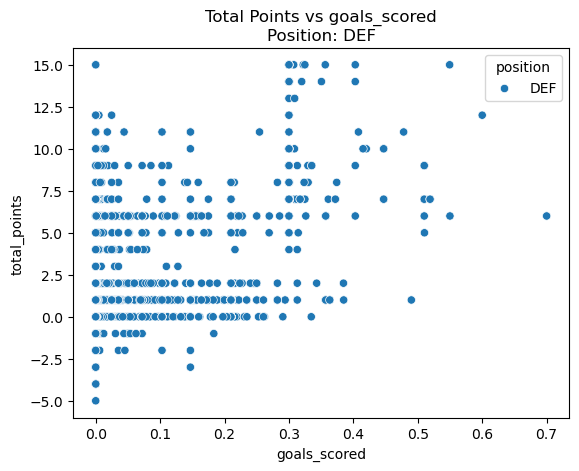

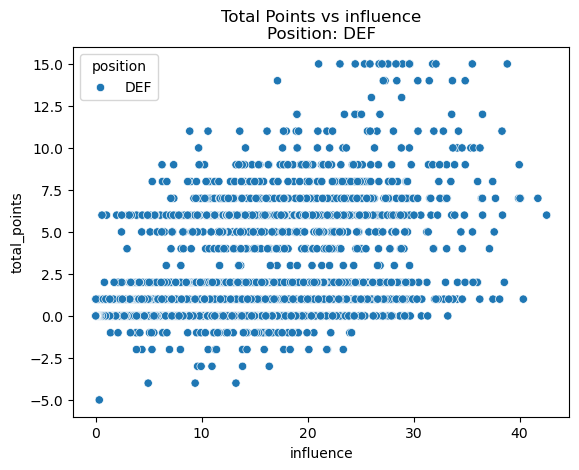

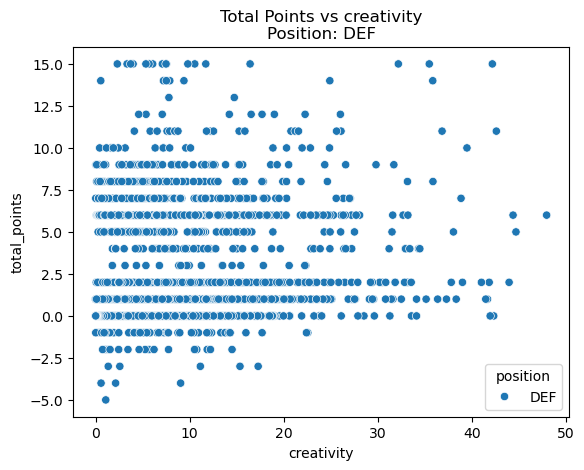

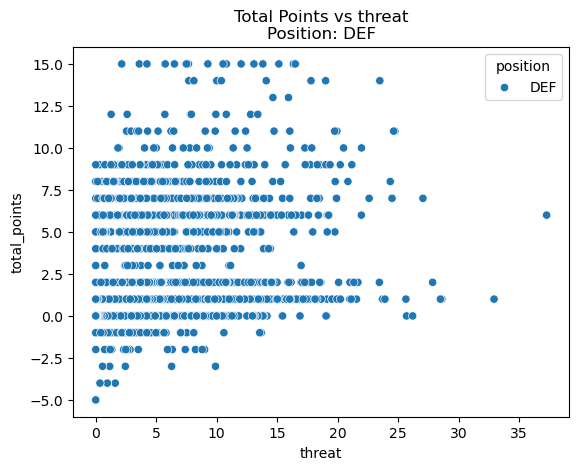

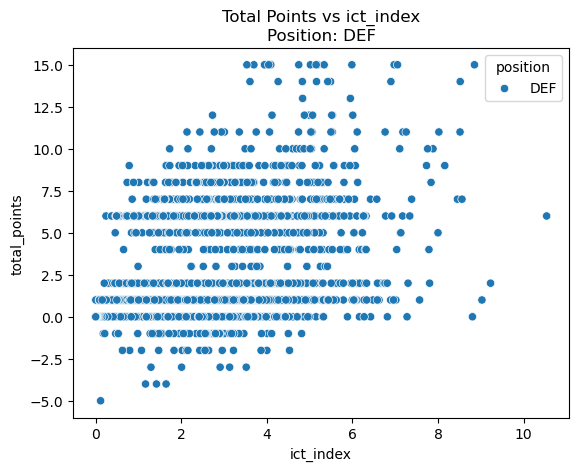

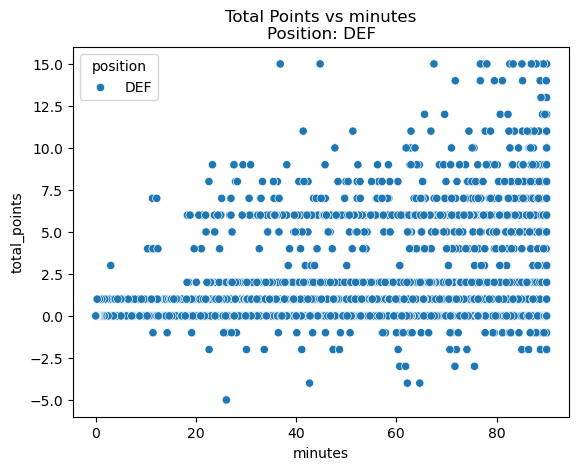

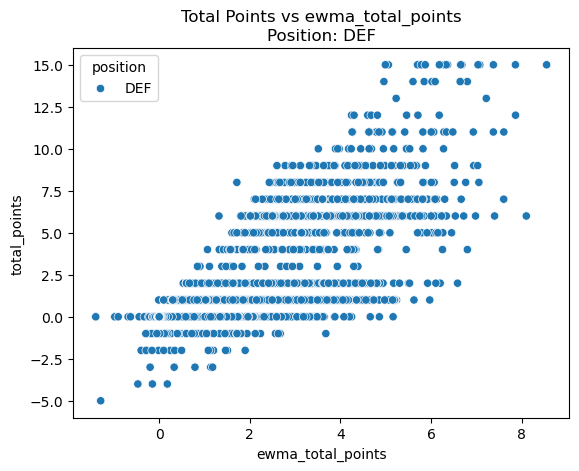

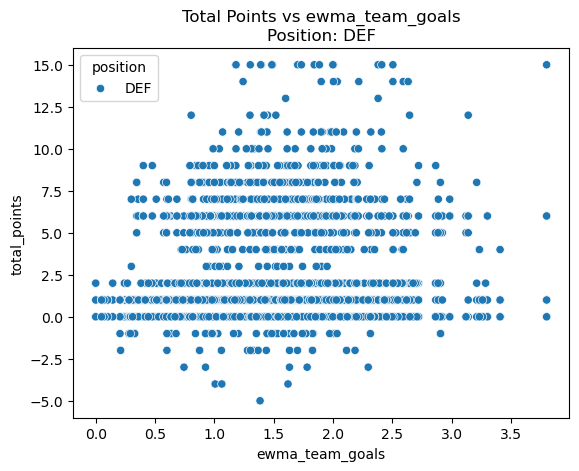

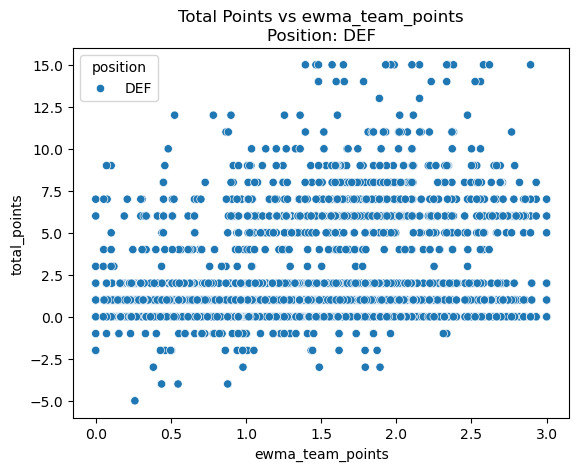

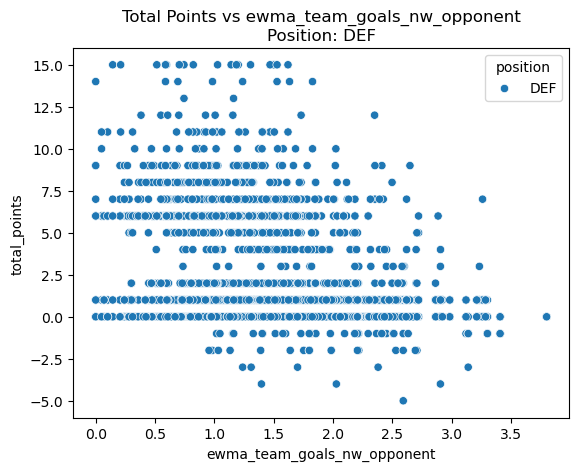

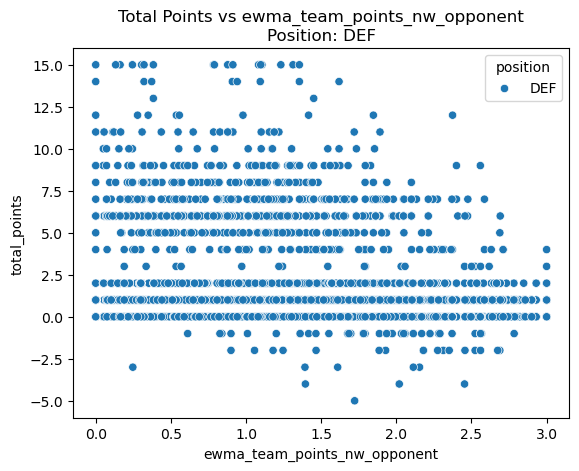

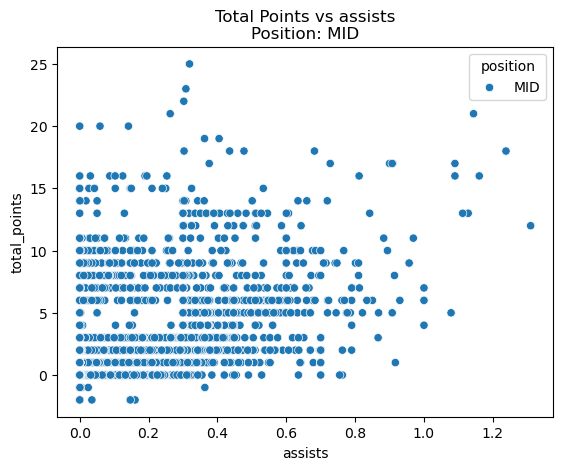

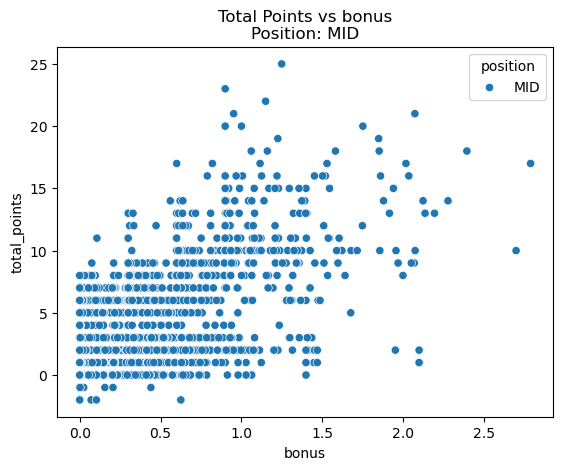

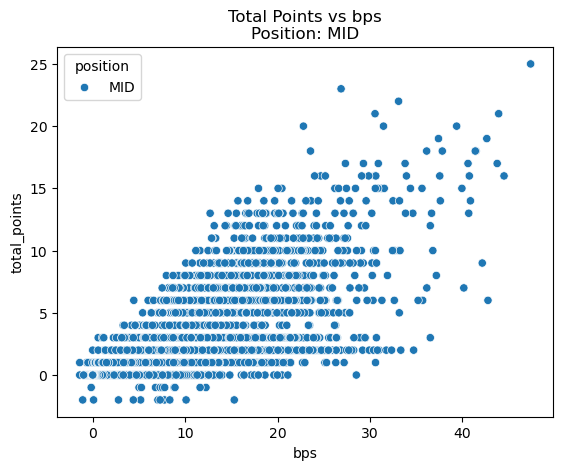

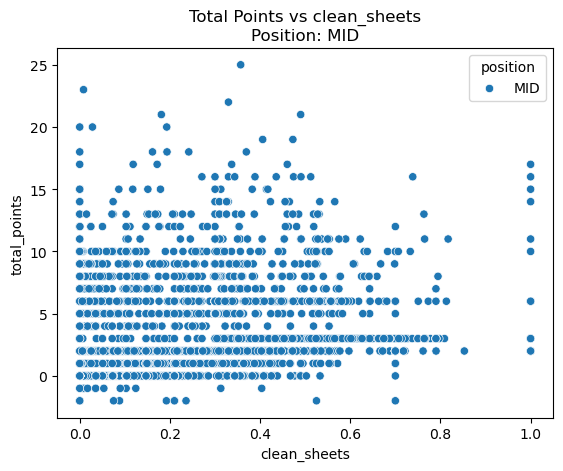

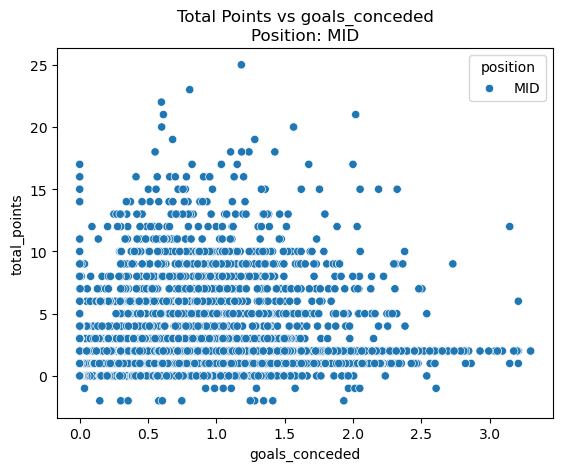

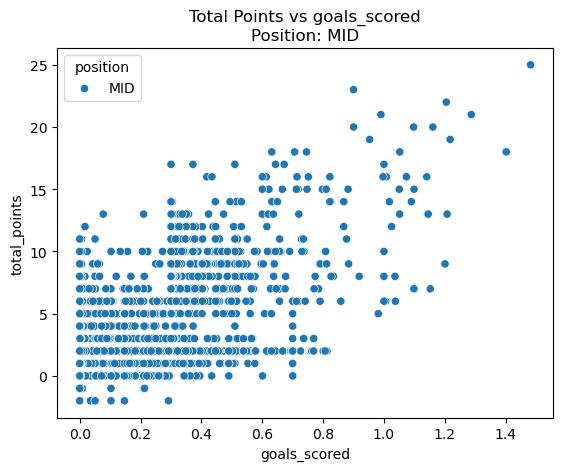

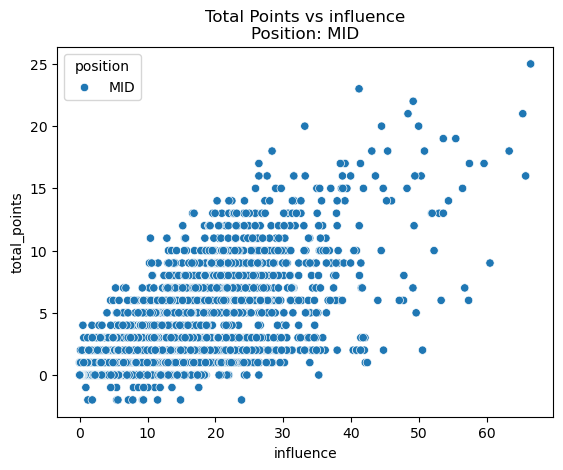

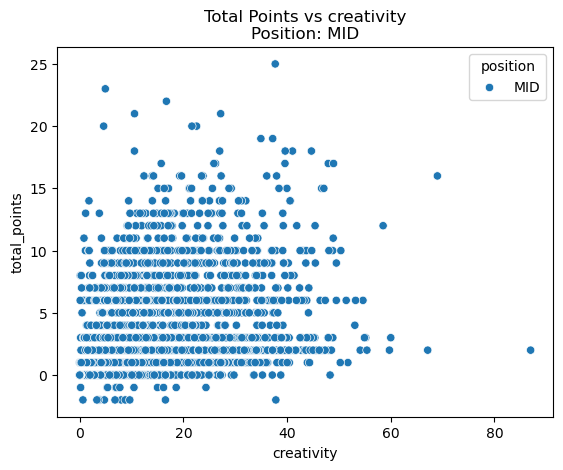

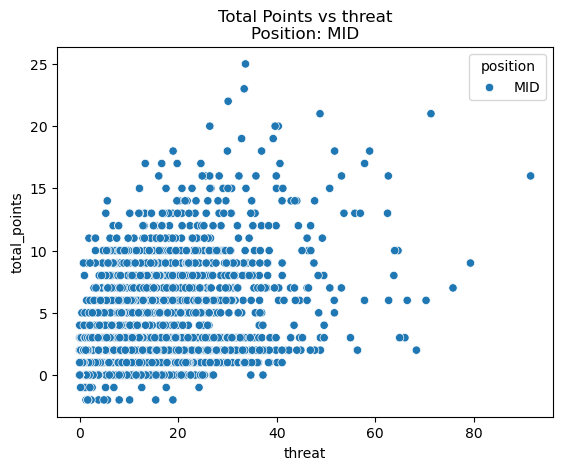

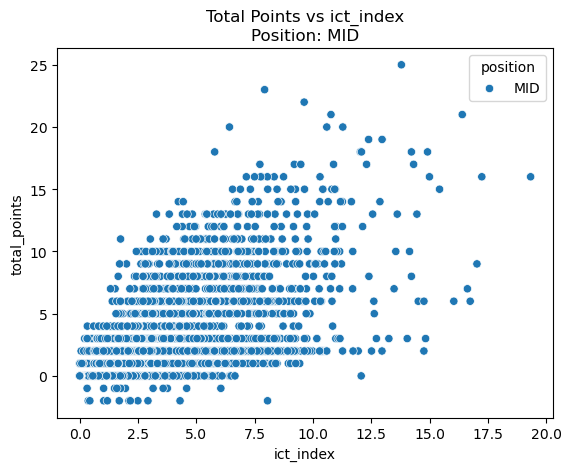

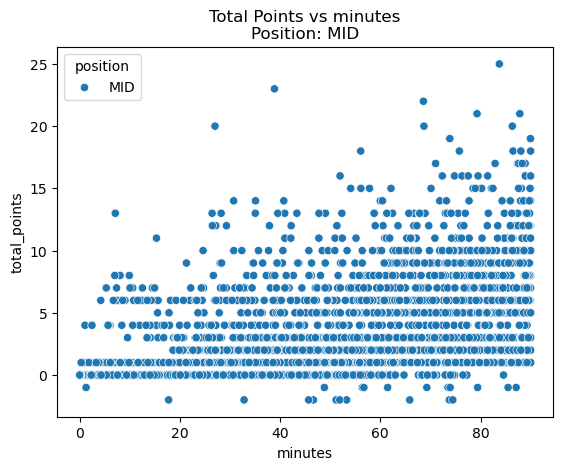

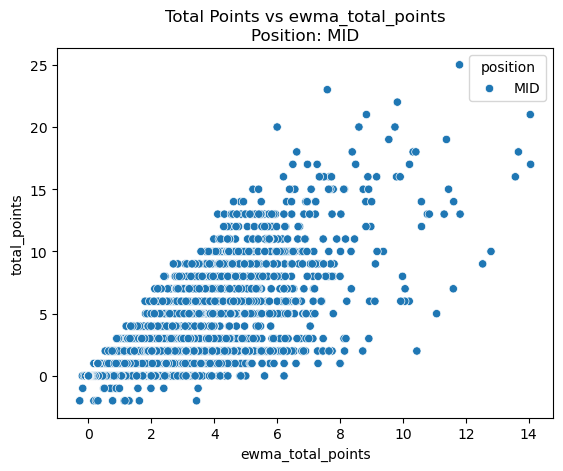

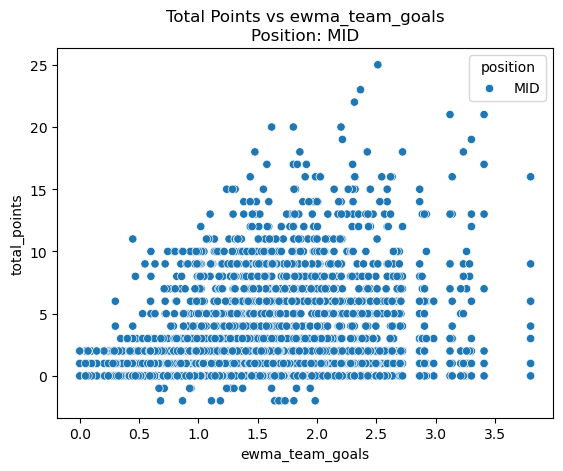

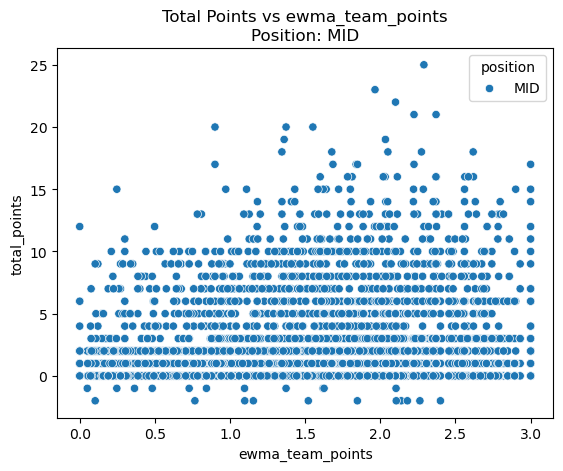

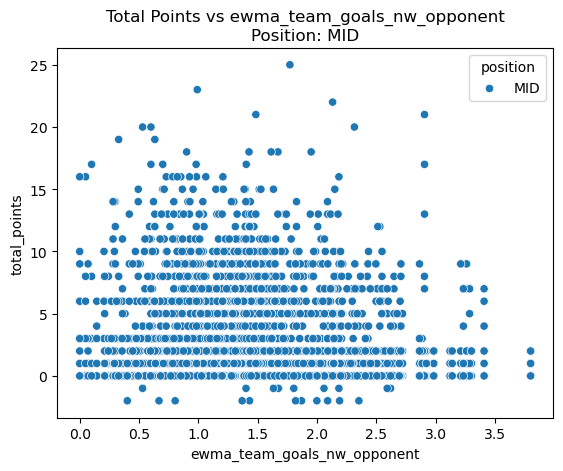

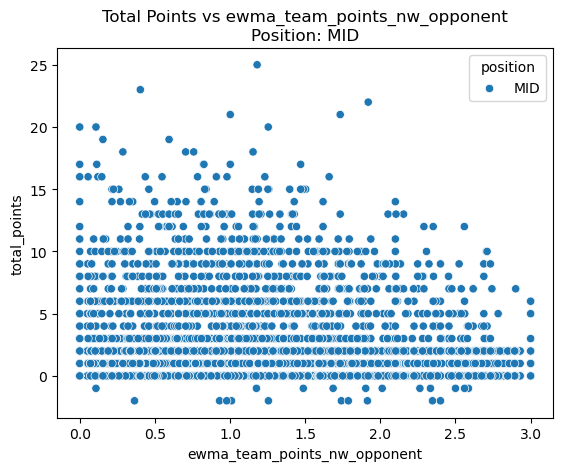

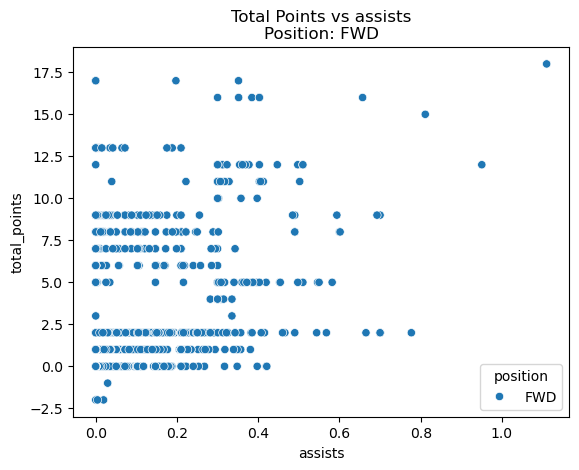

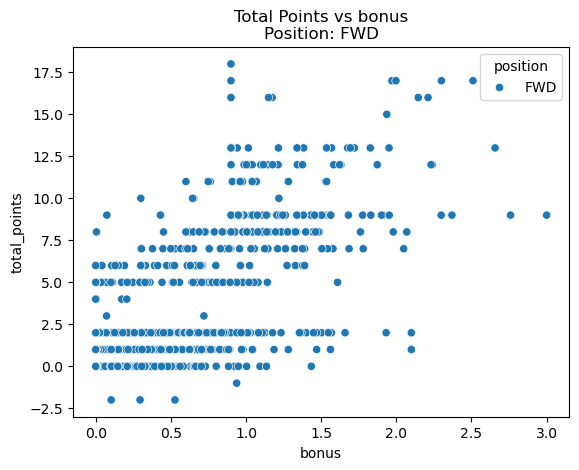

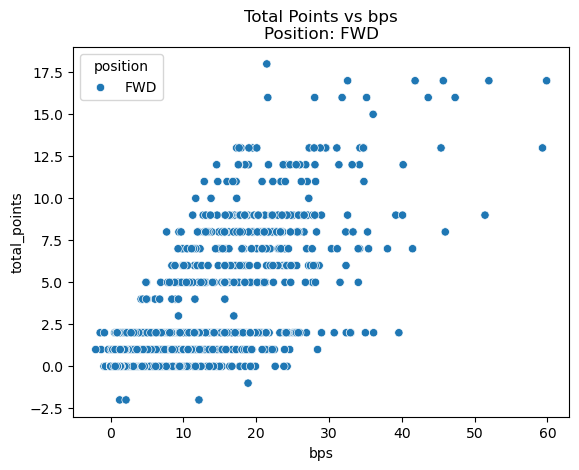

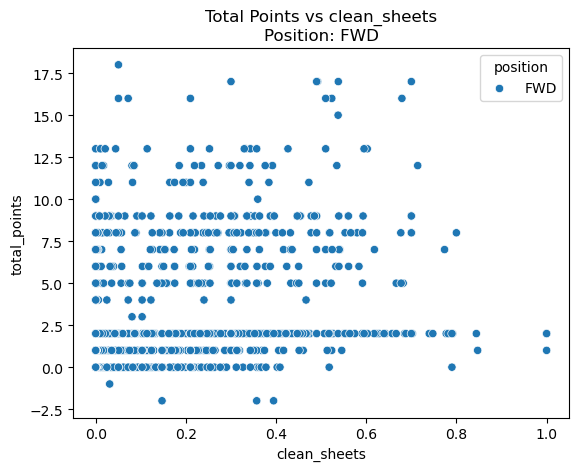

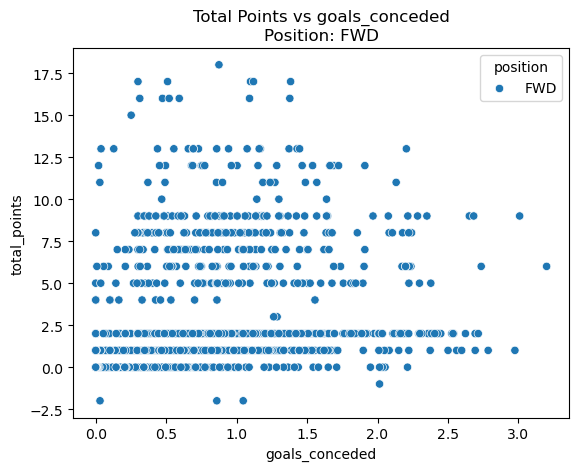

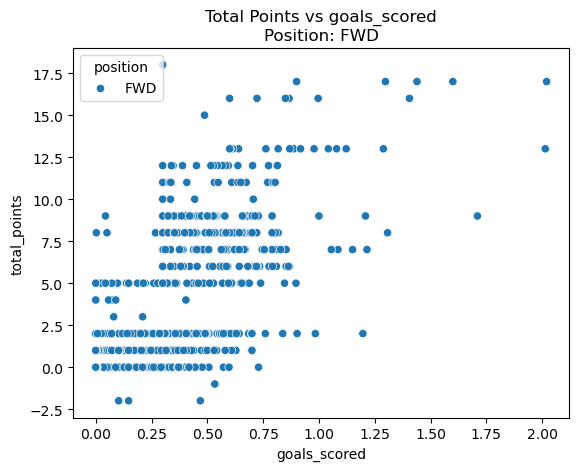

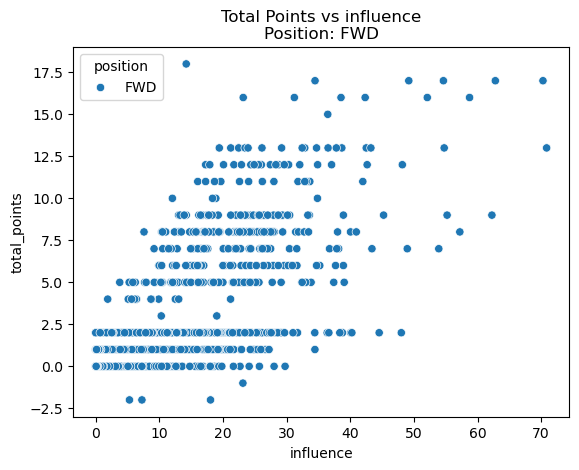

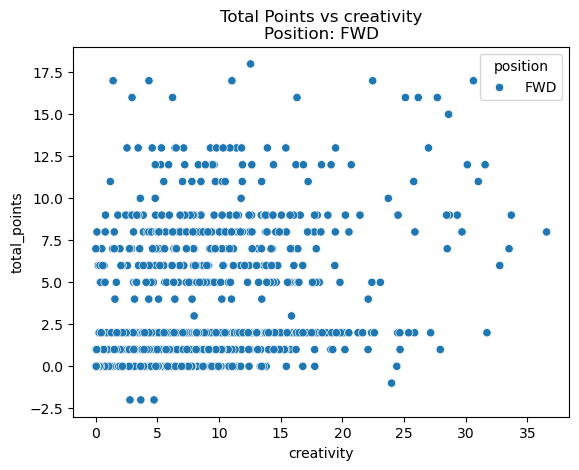

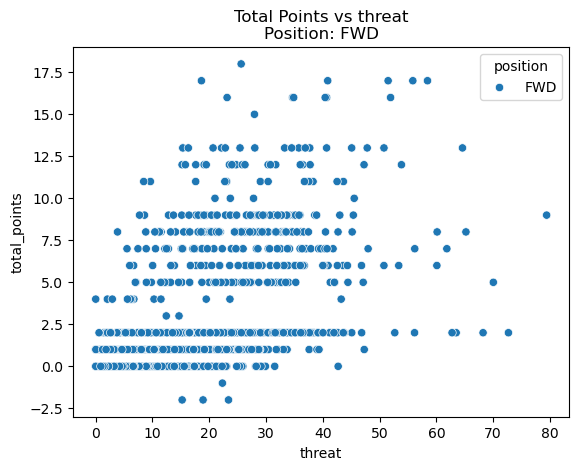

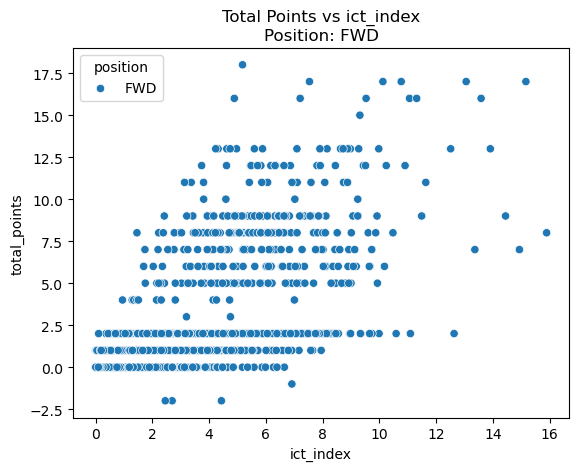

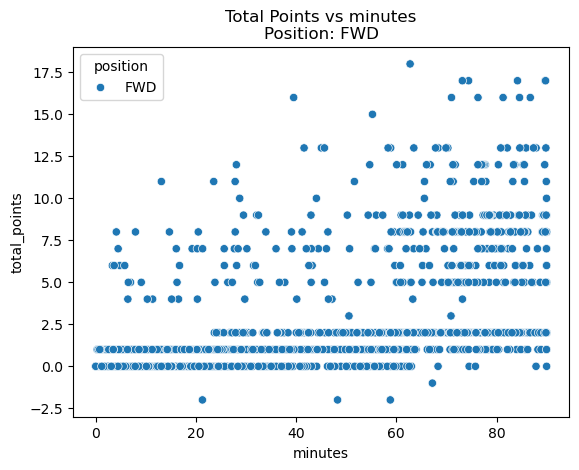

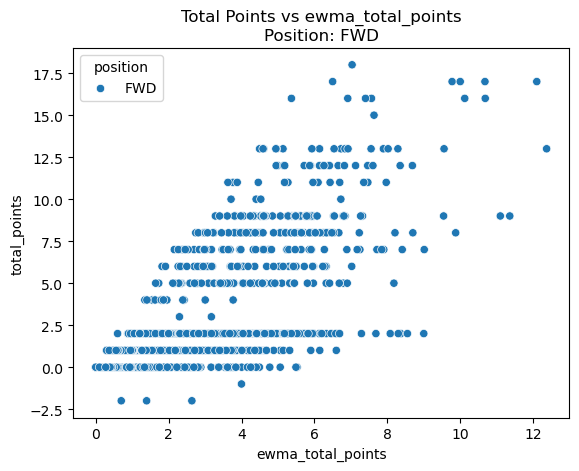

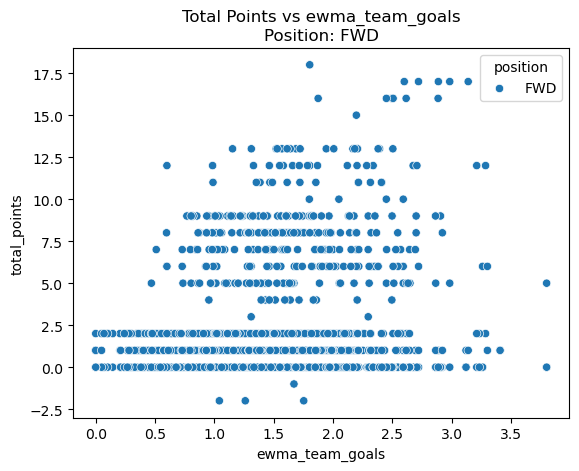

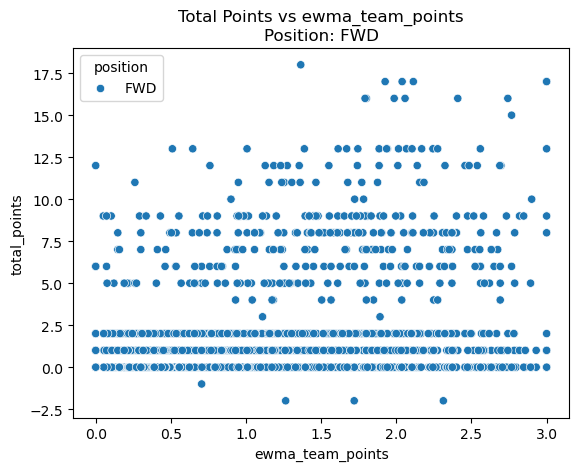

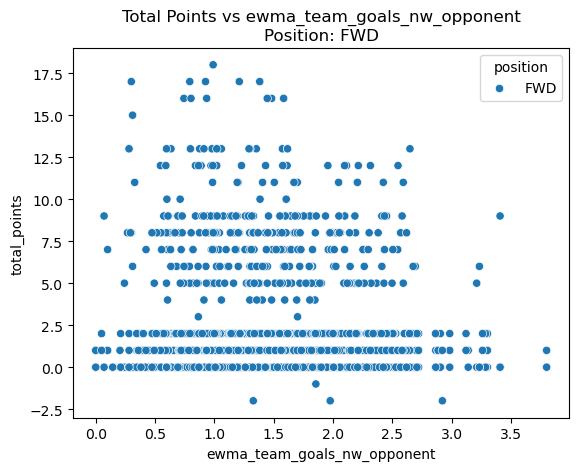

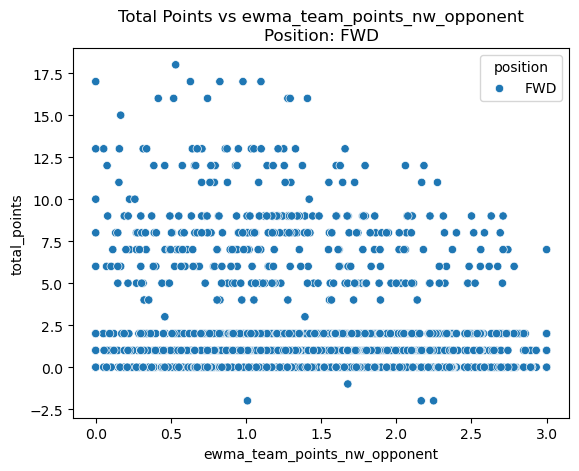

In [61]:
for pos in ['GK', 'DEF', 'MID', 'FWD']:
    training_df_pos = training_df.query('position==@pos')
    for feature in features:
        plt.figure(pos+feature)
        sns.scatterplot(data=training_df_pos, x=feature, y='total_points', hue='position')
        plt.title(f'Total Points vs {feature}\nPosition: {pos}')
        plt.show()